$$\huge \text{ Module 5 Neural Nets and TensorFlow2}$$

<font size=4>__What is TensorFlow - Deep Learning and who uses it__

[TensorFlow](https://www.tensorflow.org/)
    
    
    
[Deep Learning](https://en.wikipedia.org/wiki/Deep_learning)

[Case studies](https://www.tensorflow.org/about/case-studies)



##### Copyright 2019 The TensorFlow Authors.

In [1]:
#@title Licensed under the Apache License, Version 2.0 (the "License");
# you may not use this file except in compliance with the License.
# You may obtain a copy of the License at
#
# https://www.apache.org/licenses/LICENSE-2.0
#
# Unless required by applicable law or agreed to in writing, software
# distributed under the License is distributed on an "AS IS" BASIS,
# WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
# See the License for the specific language governing permissions and
# limitations under the License.

# TensorFlow 2 quickstart for beginners

<font size=4 color =red> __Note: I editied this Notebook to fit our class but the but the heart of the material is from the  link  below__

<table class="tfo-notebook-buttons" align="left">
  <td>
    <a target="_blank" href="https://www.tensorflow.org/tutorials/quickstart/beginner"><img src="https://www.tensorflow.org/images/tf_logo_32px.png" />View on TensorFlow.org</a>
  </td>
  <td>
    <a target="_blank" href="https://colab.research.google.com/github/tensorflow/docs/blob/master/site/en/tutorials/quickstart/beginner.ipynb"><img src="https://www.tensorflow.org/images/colab_logo_32px.png" />Run in Google Colab</a>
  </td>
  <td>
    <a target="_blank" href="https://github.com/tensorflow/docs/blob/master/site/en/tutorials/quickstart/beginner.ipynb"><img src="https://www.tensorflow.org/images/GitHub-Mark-32px.png" />View source on GitHub</a>
  </td>
  <td>
    <a href="https://storage.googleapis.com/tensorflow_docs/docs/site/en/tutorials/quickstart/beginner.ipynb"><img src="https://www.tensorflow.org/images/download_logo_32px.png" />Download notebook</a>
  </td>
</table>

<font size=4> This short introduction uses [Keras](https://www.tensorflow.org/guide/keras/overview) to:

1. Build a neural network that classifies images.
2. Train this neural network.
3. And, finally, evaluate the accuracy of the model.

In [2]:
!pip install tensorflow



<font size=4>  If you want to run this locally instead of in Colab you probably need to install TensorFlow
Download and install TensorFlow 2. Import TensorFlow into your program:

Note: Upgrade `pip` to install the TensorFlow 2 package. See the [install guide](https://www.tensorflow.org/install) for details.

In [3]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
np.random.seed(seed=23)
print("TensorFlow version:", tf.__version__)

TensorFlow version: 2.14.0


<font size=4> Load and prepare the [MNIST dataset](http://yann.lecun.com/exdb/mnist/). Convert the samples from integers to floating-point numbers and use a minmax scalar.

In [4]:
mnist = keras.datasets.mnist


(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0#Min Max scaling

In [5]:
x_train.shape

(60000, 28, 28)

In [6]:
#x_train

<font size=4> __Diagrams for Neural Networks__

This network consists of an input layer (Layer 1) , 2 hidden layers an an output layer (Layer 4).  Lets track the dimensions.

* 3 inputs -> 3 outputs in layer 2: requires $3\times 3$ matrix
* 3 inputs -> 4 outputs in layer 3: requires $3\times 4$ matrix
* 4 inputs -> 2 outputs in layer 4: requires $4 \times 2$ matrix

At the end of each layer an activation function (sigmoid, relu,..)  is applied giving our classifier a very non linear component.  

<font color =red>Note this scheme does matrix multiplication with the vector on the left, i.e.,  ${\bf x} A$ instead of the normal $A{\bf x}$.
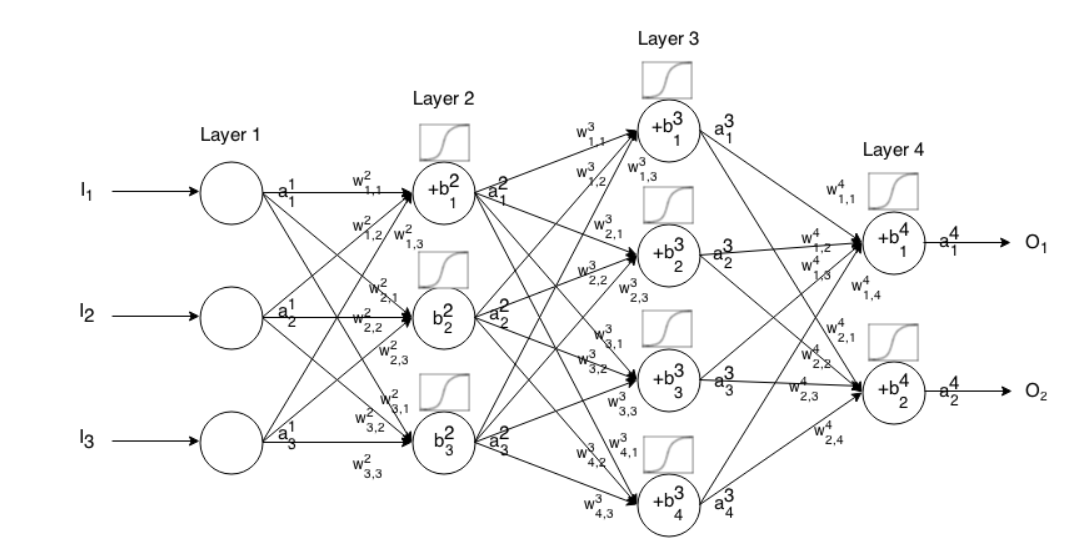
<font color =red>
The adjective "deep" in deep learning comes from the use of multiple layers in the network.

<font size=4>Build the `tf.keras.Sequential` model by stacking layers. Choose an optimizer and loss function for training:

In [7]:
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(10)
])

<font size=4> __Choose a Loss(Error) Function__ We used MSE when we started"learning" but this one is more simialr to the design from Logisitc Regression. The `losses.SparseCategoricalCrossentropy` loss takes a vector of logits and a `True` index and returns a scalar loss for each example. Here are the choices in TensorFlow for [Loss Functions](https://www.tensorflow.org/api_docs/python/tf/keras/losses)

In [8]:
loss_fn = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)

<font size =4> __Choose an optimizer for the Gradient Descent__ [Overview](https://ruder.io/optimizing-gradient-descent/) 
Here are the [Tensor Flow Optimizers](https://www.tensorflow.org/api_docs/python/tf/keras/optimizers)

In [9]:
model.compile(optimizer='adam',
              loss=loss_fn,
              metrics=['accuracy'])

<font size=4> The `Model.fit` method adjusts the model parameters to minimize the loss.  Epochs are the number of [times we go through the training set](https://machinelearningmastery.com/difference-between-a-batch-and-an-epoch/)  

In [10]:
model.fit(x_train, y_train, epochs=5,verbose=2)

Epoch 1/5
1875/1875 - 103s - loss: 0.2607 - accuracy: 0.9258 - 103s/epoch - 55ms/step
Epoch 2/5
1875/1875 - 8s - loss: 0.1133 - accuracy: 0.9661 - 8s/epoch - 4ms/step
Epoch 3/5
1875/1875 - 9s - loss: 0.0757 - accuracy: 0.9770 - 9s/epoch - 5ms/step
Epoch 4/5
1875/1875 - 8s - loss: 0.0564 - accuracy: 0.9827 - 8s/epoch - 4ms/step
Epoch 5/5
1875/1875 - 8s - loss: 0.0436 - accuracy: 0.9869 - 8s/epoch - 4ms/step


<font size=4> The `Model.evaluate` method checks the models performance, usually on a "[Validation-set](https://developers.google.com/machine-learning/glossary#validation-set)" or "[Test-set](https://developers.google.com/machine-learning/glossary#test-set)".

In [11]:
model.evaluate(x_test,  y_test, verbose=1
              )


313/313 [==============================] - 1s 3ms/step - loss: 0.0730 - accuracy: 0.9797


[0.07299331575632095, 0.9797000288963318]

<font size=4 color=blue> The image classifier is now trained to ~97% accuracy on this dataset. That is pretty good.  We only got 91% when we used SGDClassifier in Module 3</font> To learn more, read the [TensorFlow tutorials](https://www.tensorflow.org/tutorials/).

<font size=4> If you want your model to return a probability, you can wrap the trained model, and attach the softmax to it.

In [12]:
probability_model =(tf.keras.Sequential([
  model,
  tf.keras.layers.Softmax()
]))

<font size=4> Now adding np.arg max we will predict the first 10.

In [13]:
probability_model(x_test[:10])

<tf.Tensor: shape=(10, 10), dtype=float32, numpy=
array([[2.5981908e-08, 7.8074356e-09, 1.2331395e-05, 4.8208742e-05,
        1.3436041e-11, 4.3499060e-08, 2.5309431e-14, 9.9993587e-01,
        2.4455895e-07, 3.3223987e-06],
       [1.4832916e-09, 1.1196090e-05, 9.9995637e-01, 3.1519048e-05,
        7.3104243e-16, 3.7893098e-08, 3.8627110e-09, 6.0545038e-15,
        8.2038082e-07, 6.2626092e-11],
       [1.3304744e-06, 9.9176663e-01, 1.2415670e-03, 6.3092120e-05,
        1.2404285e-03, 5.1363826e-05, 5.8235819e-05, 1.4663308e-03,
        4.1045784e-03, 6.5236359e-06],
       [9.9995089e-01, 8.6785468e-09, 4.7309727e-06, 1.8464313e-08,
        2.6749121e-06, 1.7267379e-05, 5.1827483e-06, 1.5674055e-05,
        7.6155278e-09, 3.5609096e-06],
       [1.5908955e-07, 1.4205470e-08, 1.1382816e-06, 2.5864804e-09,
        9.9863952e-01, 1.0974447e-06, 4.2346088e-08, 7.2330636e-06,
        4.4234953e-06, 1.3463837e-03],
       [1.4305375e-08, 9.9746943e-01, 9.7714483e-06, 7.4516474e-06,
       

In [14]:
y_test[:10]

array([7, 2, 1, 0, 4, 1, 4, 9, 5, 9], dtype=uint8)

## Save Model

In [15]:
#!pip install -q pyyaml h5py run once
model.save('first_tensorflow.h6')

INFO:tensorflow:Assets written to: first_tensorflow.h6\assets


INFO:tensorflow:Assets written to: first_tensorflow.h6\assets


In [16]:
new_model = tf.keras.models.load_model('first_tensorflow.h6')
new_model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                                 
Total params: 101770 (397.54 KB)
Trainable params: 101770 (397.54 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [17]:
785*128


100480

In [18]:
new_model.evaluate(x_test,  y_test, verbose=2)

313/313 - 1s - loss: 0.0730 - accuracy: 0.9797 - 999ms/epoch - 3ms/step


[0.07299331575632095, 0.9797000288963318]

# Deeper Model

Let's use the same data but add some more layers

In [19]:
model2 = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(256, activation='relu'),
  tf.keras.layers.Dense(256, activation='sigmoid'),
  tf.keras.layers.Dense(256, activation='relu'),
  tf.keras.layers.Dense(256, activation='relu'),
  tf.keras.layers.Dense(256, activation='sigmoid'),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(10)
])

In [20]:
model2.compile(optimizer='adam',
              loss=loss_fn,
              metrics=['accuracy'])

In [21]:
model2.fit(x_train, y_train, epochs=10,verbose=2)

Epoch 1/10
1875/1875 - 20s - loss: 0.3011 - accuracy: 0.9069 - 20s/epoch - 11ms/step
Epoch 2/10
1875/1875 - 18s - loss: 0.1229 - accuracy: 0.9642 - 18s/epoch - 10ms/step
Epoch 3/10
1875/1875 - 17s - loss: 0.0895 - accuracy: 0.9741 - 17s/epoch - 9ms/step
Epoch 4/10
1875/1875 - 18s - loss: 0.0718 - accuracy: 0.9793 - 18s/epoch - 9ms/step
Epoch 5/10
1875/1875 - 18s - loss: 0.0569 - accuracy: 0.9830 - 18s/epoch - 10ms/step
Epoch 6/10
1875/1875 - 18s - loss: 0.0479 - accuracy: 0.9860 - 18s/epoch - 10ms/step
Epoch 7/10
1875/1875 - 18s - loss: 0.0412 - accuracy: 0.9876 - 18s/epoch - 9ms/step
Epoch 8/10
1875/1875 - 18s - loss: 0.0349 - accuracy: 0.9895 - 18s/epoch - 9ms/step
Epoch 9/10
1875/1875 - 18s - loss: 0.0318 - accuracy: 0.9907 - 18s/epoch - 10ms/step
Epoch 10/10
1875/1875 - 18s - loss: 0.0292 - accuracy: 0.9913 - 18s/epoch - 10ms/step


In [22]:
model2.evaluate(x_test,  y_test, verbose=2)

313/313 - 2s - loss: 0.0804 - accuracy: 0.9817 - 2s/epoch - 5ms/step


[0.08035062253475189, 0.9817000031471252]

In [23]:
model2.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 dense_2 (Dense)             (None, 256)               200960    
                                                                 
 dense_3 (Dense)             (None, 256)               65792     
                                                                 
 dense_4 (Dense)             (None, 256)               65792     
                                                                 
 dense_5 (Dense)             (None, 256)               65792     
                                                                 
 dense_6 (Dense)             (None, 256)               65792     
                                                                 
 dropout (Dropout)           (None, 256)              

<font size =4> So we improved our accuracy slightly. <font color=blue> WHAT WAS THE TRADEOFF?

# Options in Selecting/Creating Models.

<font size=4> 

* How many Layers and what szie are they?
* What Loss Function?
* Other parameters like dropout.
* What Optimizer?
* Trade off between accuracy and Training time.  Not uncommon for a traing to take 3 days for deep models



# [A Comprehensive Guide to Convolutional Neural Networks — the ELI5 way](https://towardsdatascience.com/a-comprehensive-guide-to-convolutional-neural-networks-the-eli5-way-3bd2b1164a53)

## [CNN on TensorFlow](https://www.tensorflow.org/tutorials/images/cnn)




## [Keras Hyperparameter Tuning](https://www.tensorflow.org/tutorials/keras/keras_tuner)
